In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [59]:
def MoG_generation(K=5, data_dim=2):
    assert data_dim == 2
    assert data_range == 6.0
    pi_logits = np.random.sample(K)
    pi = pi_logits / np.sum(pi_logits)

#     mu_list = []
#     for i in range(K):
#         mu_i = np.random.sample(data_dim) * data_range
#         mu_list.append(mu_i)
    mu_list = [(0.5, 0.5), (0.5, 2.5), (1.5, 1.5), (2.5, 0.5), (2.5, 2.5)]
    mu = np.array(mu_list) * 2
    
#     adv_l = [[]]
#     for i in range(data_dim):
#         _l = []
#         for v in adv_l:
#             _l.append(v + [-1.0])
#             _l.append(v + [data_range + 1.0])
#         adv_l = _l
    adv_l = [(0.5, 1.5), (1.5, 0.5), (1.5, 2.5), (2.5, 1.5)]
    adv_sample = np.array(adv_l) * 2    
    return pi, mu, adv_sample


def MoG_prob(x, pi, mu):
    K, dim = mu.shape
    assert x.shape == (dim,)
    assert pi.shape == (K,)
#     assert cov.size() == (K, dim, dim)
    
#     priors = torch.softmax(pi, dim=0)
#     cov2 = torch.bmm(cov.transpose(1, 2).contiguous(), cov)
    
    prob = 0.0
    for k in range(K):
        log_prob_k = -dim * 0.5 * math.log(2 * math.pi) - 0.5 * (x - mu[k]).dot(x - mu[k])
        prob += np.exp(log_prob_k) * pi[k]
    return prob

def MoG_plot(pi, mu):
    plt.figure(figsize=(5, 5))
    
    x1 = x2 = np.linspace(-2.0, 8.0, 101)
    p_lists = []
    for _x1 in x1:
        p = []
        for _x2 in x2:
            p.append(MoG_prob(np.array((_x1, _x2)), pi, mu) )
        p_lists.append(p)
    P = np.array(p_lists)
    
    plt.imshow(P, origin='lower', interpolation='bilinear')
    plt.xticks(np.linspace(0, 100, 6), np.linspace(-2, 8, 6))
    plt.yticks(np.linspace(0, 100, 6), np.linspace(-2, 8, 6))

def Data_plot(samples, adv_sample):
    plt.figure(figsize=(5, 5))

    x1 = [x[0] for x in samples]
    x2 = [x[1] for x in samples]
    plt.scatter(x1, x2, s=5, marker='o')
    
    x1 = [x[0] for x in adv_sample]
    x2 = [x[1] for x in adv_sample]
    plt.scatter(x1, x2, s=10, marker='X')
    
    plt.xlim(-2, 8)
    plt.ylim(-2, 8)

In [66]:
from sklearn.mixture import GaussianMixture

In [67]:
gmm = GaussianMixture(n_components=2) 

In [68]:
gmm.weights_ = pi
gmm.means_ = mu
gmm.covariances_ = np.array([np.eye(2)] * 5)

In [39]:
pi, mu, adv_sample = MoG_generation()

In [40]:
pi

array([0.21098238, 0.10501439, 0.27725302, 0.22387065, 0.18287956])

In [41]:
mu

array([[1., 1.],
       [1., 5.],
       [3., 3.],
       [5., 1.],
       [5., 5.]])

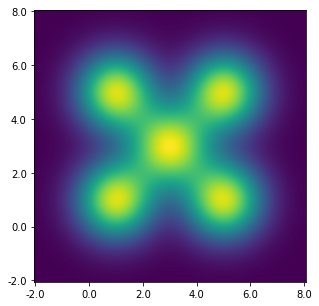

In [71]:
MoG_plot(np.array([0.2]*5), mu)
plt.savefig('MoG-plot.png')
plt.show()

In [63]:
samples = sample_from_MoG(pi, mu)

In [70]:
samples[:30]

array([[1.15191188, 1.60250036],
       [2.46127101, 1.74218208],
       [1.21009361, 0.68854354],
       [0.45387836, 1.77516455],
       [5.29652189, 1.19715306],
       [3.67380265, 4.14158457],
       [5.7754799 , 4.57661549],
       [3.18833268, 4.49140342],
       [1.24711346, 4.86352408],
       [0.27869798, 4.46523784],
       [1.34987294, 4.65079392],
       [2.79942267, 4.65723109],
       [0.54111643, 2.94574491],
       [1.6003228 , 0.53786859],
       [4.61835147, 0.95833156],
       [2.13790868, 4.39907555],
       [0.52847745, 3.95679647],
       [0.81935733, 3.88781711],
       [4.55400384, 5.57500842],
       [2.1325356 , 4.58033049],
       [0.59444243, 0.92357308],
       [5.82070095, 3.28923366],
       [0.39126869, 5.11150625],
       [2.36392519, 3.59594133],
       [5.0299922 , 3.75437596],
       [3.39364385, 0.27715393],
       [2.79404952, 1.35775979],
       [0.66048988, 1.64326257],
       [3.60685568, 0.82025505],
       [3.36193319, 3.29267776]])

In [71]:
adv_sample

array([[1., 3.],
       [3., 1.],
       [3., 5.],
       [5., 3.]])

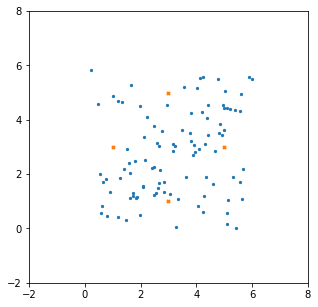

In [64]:
Data_plot(samples, adv_sample)
plt.savefig('Dataset.png')
plt.show()

In [79]:
data_fname = 'data_multi_adv.npz'
load_data = np.load(data_fname)
true_pi = load_data['pi']
true_mu = load_data['mu']
samples_100 = load_data['samples']
adv_sample = load_data['adv_sample']

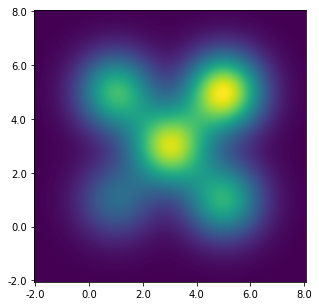

In [7]:
MoG_plot(true_pi,true_mu)

In [83]:
len(samples)

1000

In [94]:
K=5
data_dim=2
data_range=6.0
data_n=100
samples_list = []

while len(samples_list) < 1000:
    normal_sample = np.random.randn(data_dim)
    cls = np.random.randint(K)
    sample = normal_sample + true_mu[cls]
    if -.5 < sample[0] < 6.5 and -.5 < sample[1] < 6.5:
        samples_list.append(sample)
samples = np.array(samples_list)

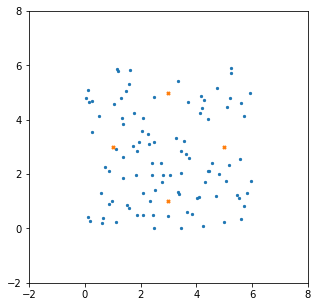

In [82]:
Data_plot(samples_100, adv_sample)
plt.savefig('Dataset-100.png')
plt.show()

In [90]:
adv_sample= [(0, 3), (3, 0), (3, 6), (6, 3)]

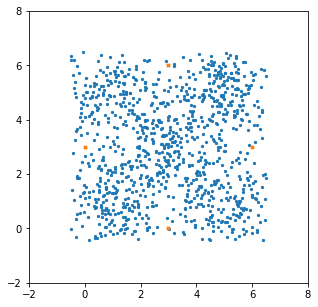

In [95]:
Data_plot(samples, adv_sample)
plt.savefig('Dataset-1000.png')
plt.show()

In [93]:
data_fname = 'data_multi_adv_1000.npz'
np.savez(data_fname, pi=pi, mu=mu, samples=samples, adv_sample=adv_sample)